In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

plt.rcParams['text.usetex'] = True

In [2]:
# Generates random upper triangular matrix
def generate_U(n):
    A = np.zeros((n,n))
    for i in range(n):
        t = np.random.random((n-i,))
        A += np.diag(t,i)
    return A

In [3]:
def solve_upper_triangular_system(U,b):
    x = np.zeros_like(b)
    n = U.shape[0]
    for i in range(n-1,-1,-1):
        x[i] = (b[i] - np.dot(U[i,i+1:],x[i+1:]))/(U[i,i])
    return x

In [359]:
n = 100
U = generate_U(n)
b = np.random.random(n)
x = solve_upper_triangular_system(U,b)
print("The error in solution of the linear system is ", np.linalg.norm(U@x-b,ord=2))

The error in solution of the linear system is  88.43359880308174


In [361]:
computation_time=[]
timer =  timeit.Timer()

for i in range(4):   
    n = 10**i
    compute_time_for_n = []
    for j in range(10**(5-i)):
        U = generate_U(n)
        b = np.random.random(n)
        start = timeit.default_timer()
        x = solve_upper_triangular_system(U,b)
        stop = timeit.default_timer() 
        #print("The time to compute the solution is", stop-start)
        compute_time_for_n.append(stop-start)
    print("The average time to compute the solution is", np.average(compute_time_for_n))
    print("The total time to compute the solution is", np.sum(compute_time_for_n))
    computation_time.append(np.average(compute_time_for_n))

 

The average time to compute the solution is 2.1826260040688794e-06
The total time to compute the solution is 0.21826260040688794
The average time to compute the solution is 1.1404619955283124e-05
The total time to compute the solution is 0.11404619955283124
The average time to compute the solution is 9.713030002603773e-05
The total time to compute the solution is 0.09713030002603773
The average time to compute the solution is 0.0012022020003496436
The total time to compute the solution is 0.12022020003496436


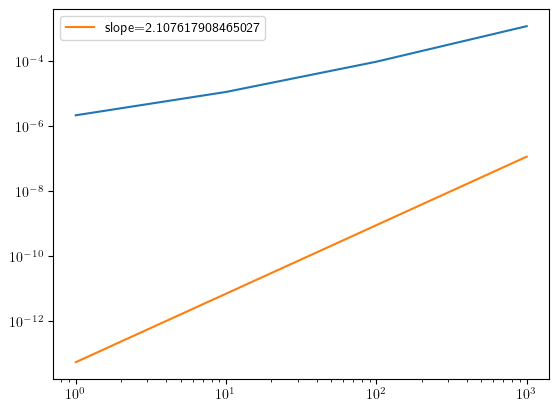

In [374]:
n = np.arange(0.,4.,1.)
plt.loglog(10**n,computation_time,base=10)
a,b = np.polyfit(n,np.log(computation_time),1)
plt.loglog(10**(n),10**(a*n+b),base=10,label=f'slope={a}')
plt.legend()
plt.show()

In [10]:
def generate_tridiagonal_matrix(n):
    l = np.random.random((n-1,))
    u = np.random.random((n-1,))
    d = np.random.random((n,))
    return np.diag(l,-1)+np.diag(d)+np.diag(u,1)


In [281]:
def solve_tridiagonal_system(T,b):
    x = np.zeros_like(b)
    n = T.shape[0]
    T = np.copy(T)
    b = np.copy(b)
    for i in range(1,n):
        T[i,i] = T[i,i] - T[i-1,i]*(T[i,i-1]/T[i-1,i-1])
        b[i] = b[i] -  b[i-1] *(T[i,i-1]/T[i-1,i-1])
    x[n-1] = b[n-1]  /T[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i] = (b[i] - x[i+1]*T[i,i+1])/T[i,i]
    return x

In [ ]:
n = 100
l = np.random.random((n-1,))
u = np.random.random((n-1,))
T = np.diag(l,-1) + np.diag(1. + np.abs(np.concatenate([np.array([0]),l],axis=0)) + 
                            np.abs(np.concatenate([u,np.array([0])],axis=0))) + np.diag(u,1)
b = np.random.random((n,))
x = solve_tridiagonal_system(T,b)
x_true = np.linalg.solve(T,b)
print("The error in the solution is :", np.linalg.norm(T@x-b,ord = 2))

The error in the solution is : 6.189244428350049e-16
